In [55]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.optimizers import Adam

In [56]:
train_dir = r'D:\Data Science notes\AI\MY_data\train'
test_dir = r'D:\Data Science notes\AI\MY_data\test'

In [57]:
image_size = (64, 64)  
batch_size = 32

In [58]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [59]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2301 images belonging to 10 classes.


In [60]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1025 images belonging to 10 classes.


In [61]:
class_labels = list(train_data.class_indices.keys())

In [62]:
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),  # Flatten the input image
    Dense(128, activation='relu'),    # Fully connected layer
    Dense(64, activation='relu'), 
    Dense(64, activation='relu'),   # Fully connected layer
    Dense(len(train_data.class_indices), activation='softmax')  # Output layer
])

In [63]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [64]:
model.fit(train_data, epochs=25, validation_data=test_data)

Epoch 1/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.1337 - loss: 3.2111 - val_accuracy: 0.1522 - val_loss: 2.3899
Epoch 2/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.2022 - loss: 2.2230 - val_accuracy: 0.2429 - val_loss: 2.1049
Epoch 3/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.2651 - loss: 2.0719 - val_accuracy: 0.2332 - val_loss: 2.2060
Epoch 4/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.2921 - loss: 1.9868 - val_accuracy: 0.2068 - val_loss: 2.0796
Epoch 5/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.3381 - loss: 1.8134 - val_accuracy: 0.2049 - val_loss: 2.0432
Epoch 6/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.3615 - loss: 1.7169 - val_accuracy: 0.2810 - val_loss: 1.9476
Epoch 7/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.4071 - loss: 1.6054 - val_accuracy: 0.2820 - val_loss: 1.8346
Epoch 8/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.4181 - loss: 1.6012 - val_accuracy: 0.3102 - 

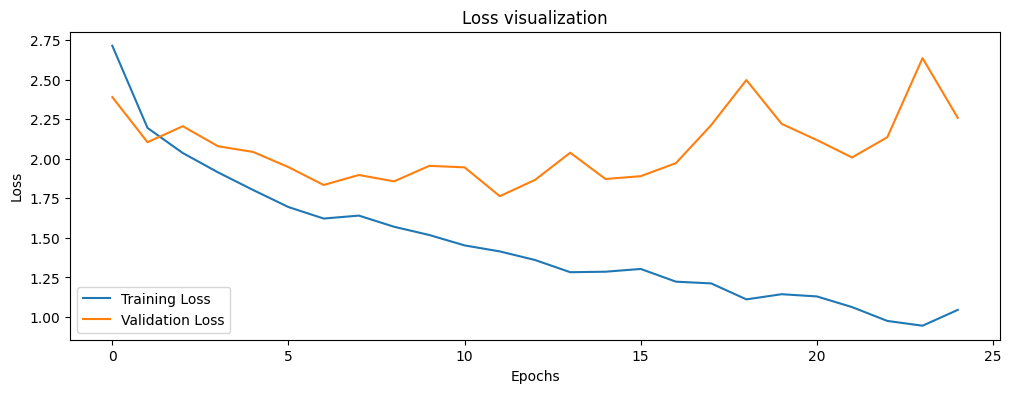

In [65]:
plt.figure(figsize=(12,4))
plt.plot(model.history.history["loss"],label="Training Loss")
plt.plot(model.history.history["val_loss"],label="Validation Loss")
plt.title("Loss visualization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

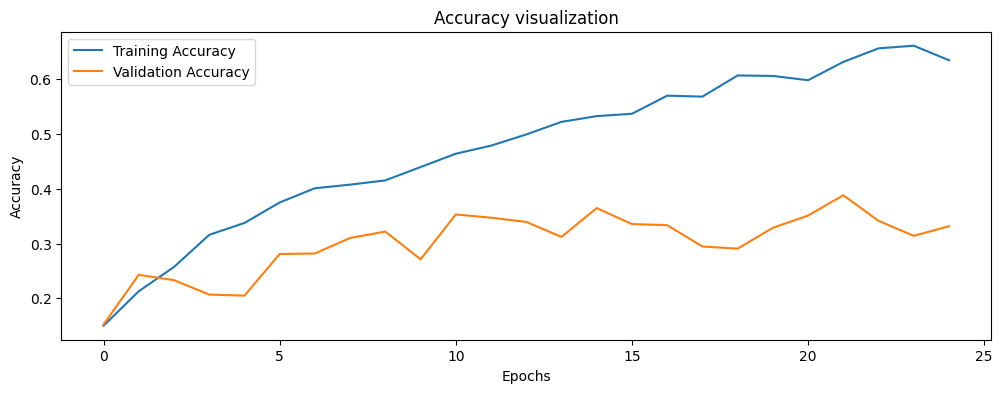

In [66]:
plt.figure(figsize=(12,4))
plt.plot(model.history.history["accuracy"],label="Training Accuracy")
plt.plot(model.history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Accuracy visualization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [67]:

def predict_image(image_path):
    img = load_img(image_path, target_size=(64, 64))  
    img_array = img_to_array(img) / 255.0 
    img_array = np.expand_dims(img_array, axis=0)  
    predictions = model.predict(img_array)
    predicted_class = class_labels[np.argmax(predictions)]
    
    return predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


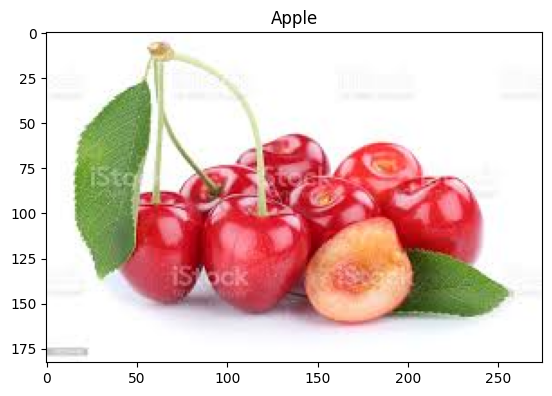

In [68]:
plt.title(predict_image(r"41.jpeg"))
plt.imshow(load_img(r"41.jpeg"))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


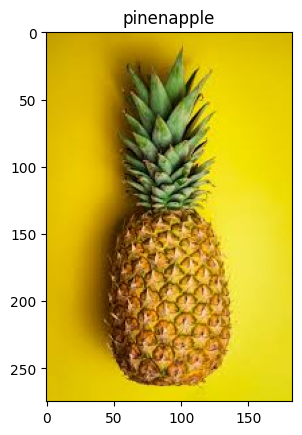

In [76]:
plt.title(predict_image("66.jpeg"))
plt.imshow(load_img(r"66.jpeg"))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


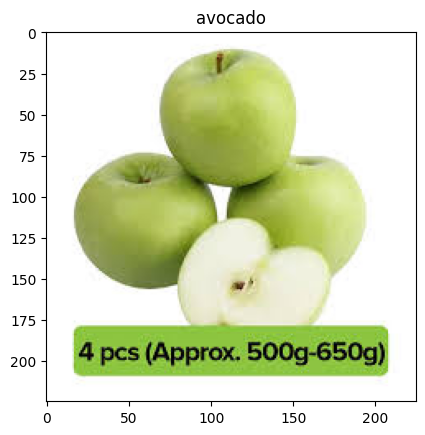

In [77]:
plt.title(predict_image(r"D:\Data Science notes\AI\predict\2.jpeg"))
plt.imshow(load_img(r"D:\Data Science notes\AI\predict\2.jpeg"))
plt.show()

In [71]:
predict_image(r"D:\Data Science notes\AI\predict\f0.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'Apple'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


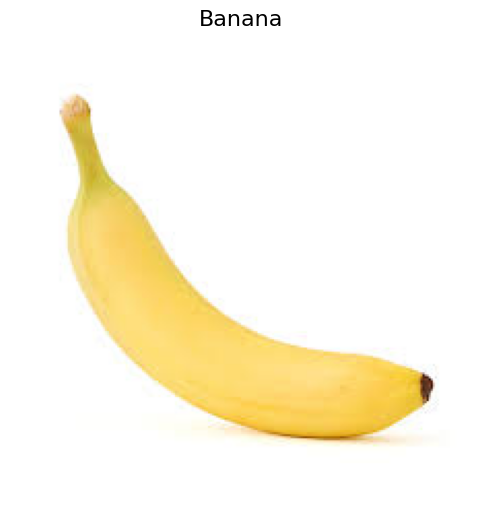

In [72]:

plt.figure(figsize=(6, 6))
plt.imshow(load_img(r"D:\Data Science notes\AI\predict\img_141.jpeg"))
plt.title(predict_image(r"D:\Data Science notes\AI\predict\img_141.jpeg"), fontsize=16)
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


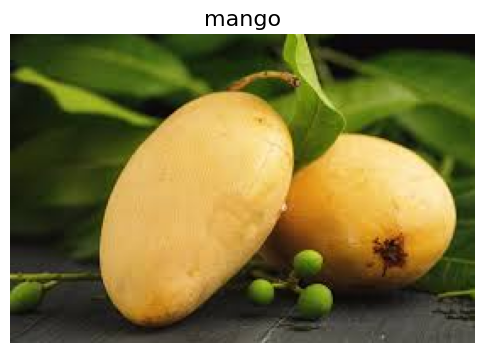

In [74]:
plt.figure(figsize=(6, 6))
plt.imshow(load_img(r"D:\Data Science notes\AI\predict\img_341.jpeg"))
plt.title(predict_image(r"D:\Data Science notes\AI\predict\img_341.jpeg"), fontsize=16)
plt.axis('off')
plt.show()